<a href="https://colab.research.google.com/github/ingridMaye/angular-02-bases/blob/main/IA_BLOQUE_2025_Sesi%C3%B3n_2_Demo_1_Aprendizaje_cl%C3%A1sico_y_profundo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

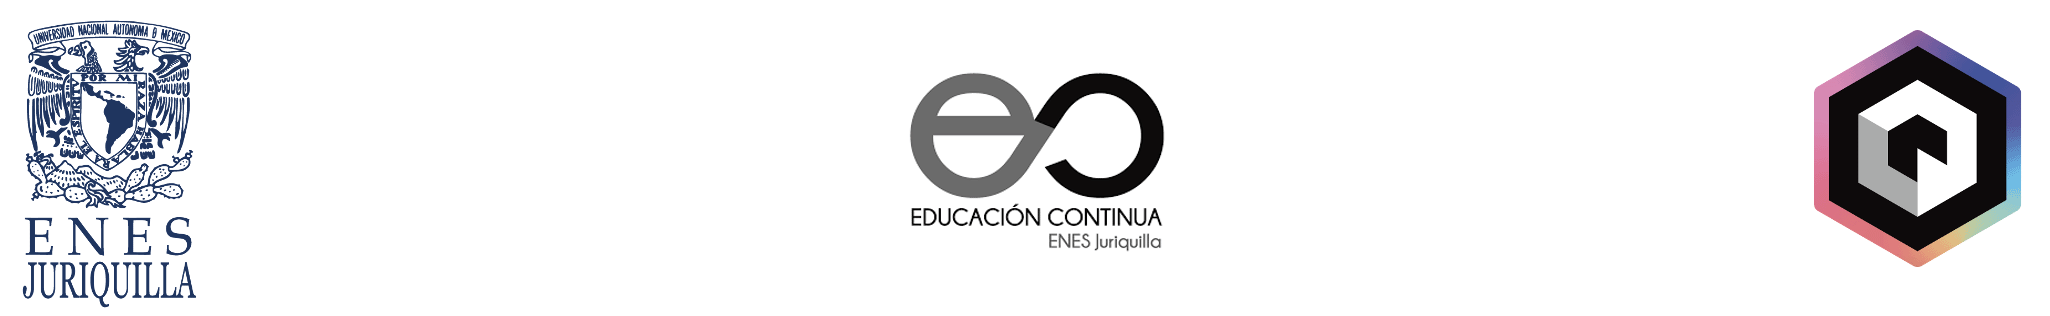





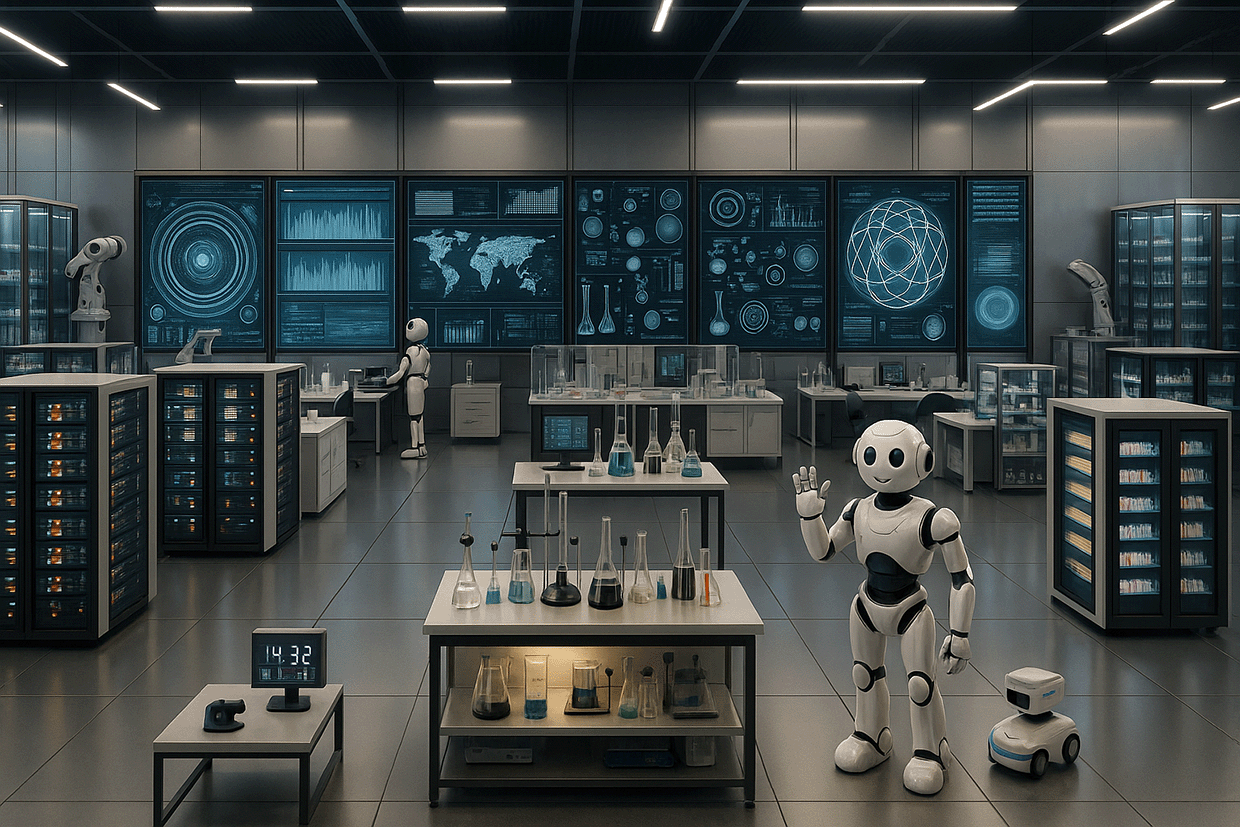

# Inteligencia Artificial y Aprendizje Automático
## ENES Juriquilla - BLOQUE
### Sesión 2: Aprendizaje clásico y profundo
### Fecha: 23 de abril de 2025
### Presentan:
> Dr. Ulises Olivares Pinto (uolivares@unam.mx)

> Fernando Ramírez González

# 1. Regresión lineal: predicción de precios de casas

Este notebook entrena un modelo de regresión lineal para predecir el precio de casas en millones de pesos, a partir del tamaño en m². Se divide el conjunto de datos en entrenamiento y prueba.


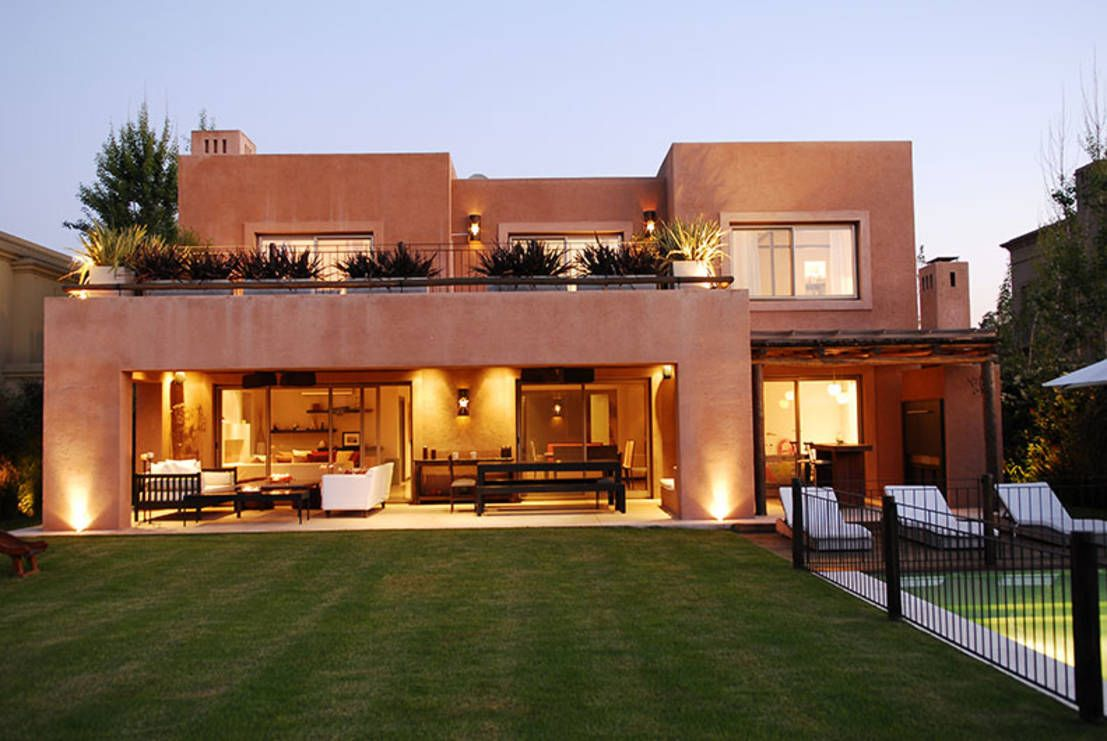

In [ ]:
# 1. Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# 2. Datos simulados con precios en millones de pesos
tamaños = np.array([40, 50, 60, 70, 80, 90, 100, 110, 120, 130])
precios = np.array([1.2, 1.4, 1.65, 1.8, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5]) + np.random.normal(0, 0.1, 10) # Genera números aleatorios de 0 a 0.1 millones $

print("registros totales: ", len(precios))

X = tamaños.reshape(-1, 1)
y = precios.reshape(-1, 1)

for i, j in zip(X, y):
    print(f"Una casa de {i.item()} m² tiene un costo de {j.item():.2f} millones de pesos.")



# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



registros totales:  10
Una casa de 40 m² tiene un costo de 1.17 millones de pesos.
Una casa de 50 m² tiene un costo de 1.42 millones de pesos.
Una casa de 60 m² tiene un costo de 1.60 millones de pesos.
Una casa de 70 m² tiene un costo de 1.79 millones de pesos.
Una casa de 80 m² tiene un costo de 2.16 millones de pesos.
Una casa de 90 m² tiene un costo de 2.29 millones de pesos.
Una casa de 100 m² tiene un costo de 2.63 millones de pesos.
Una casa de 110 m² tiene un costo de 2.81 millones de pesos.
Una casa de 120 m² tiene un costo de 3.35 millones de pesos.
Una casa de 130 m² tiene un costo de 3.59 millones de pesos.


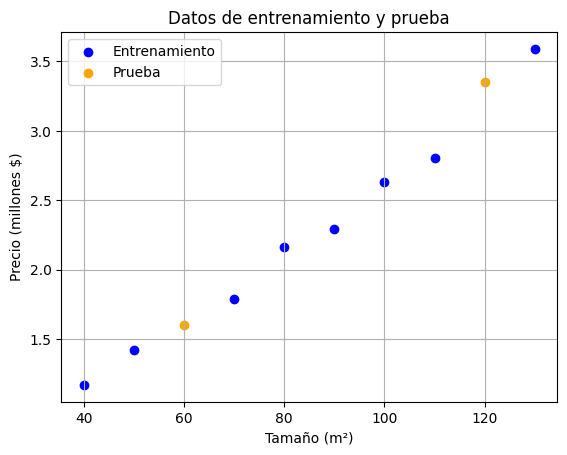

In [ ]:
# 3. Visualización de datos de entrenamiento y prueba
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='orange', label='Prueba')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (millones $)')
plt.title('Datos de entrenamiento y prueba')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 4. Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

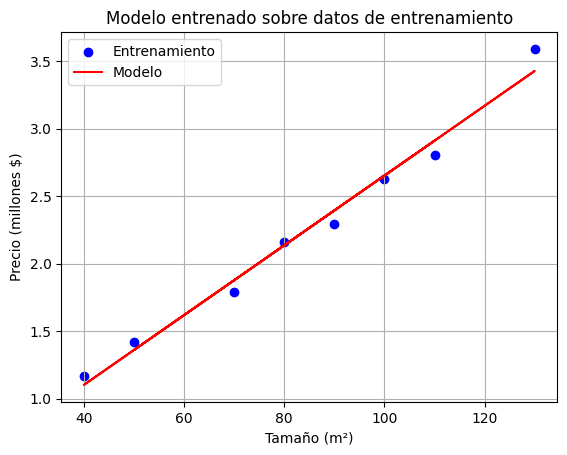

In [ ]:
# 5. Visualizar la línea ajustada sobre los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.plot(X_train, modelo.predict(X_train), color='red', label='Modelo')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (millones $)')
plt.title('Modelo entrenado sobre datos de entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 6. Evaluar el modelo sobre los datos de prueba
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)
print("MSE en prueba:", mean_squared_error(y_test, y_pred))
print("R² en prueba:", r2_score(y_test, y_pred))


MSE en prueba: 0.01628982482313308
R² en prueba: 0.9786084018915938


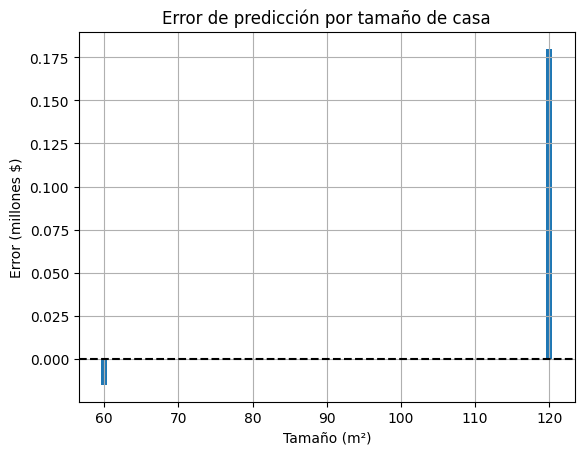

In [ ]:
errores = y_test.flatten() - y_pred.flatten()
etiquetas = X_test.flatten()

plt.bar(etiquetas, errores)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Error (millones $)')
plt.title('Error de predicción por tamaño de casa')
plt.grid(True)
plt.show()


## 1.1 Ejercicio: Evaluación en nuevos datos ✍️

Agrega las siguientes observaciones nuevas al conjunto de prueba:

| Tamaño (m²) | Precio real (millones $) |
|-------------|--------------------------|
| 100         | 2.5                      |
| 125         | 3.3                      |

1. Usa el modelo entrenado para predecir el precio de estas casas.
2. Compara las predicciones con los valores reales.
3. Calcula el error cuadrático medio para cada observación.


In [ ]:
# Evaluar el modelo con nuevos datos no vistos
# Datos nuevos

X_nuevos = np.array([[100], [125]])
y_nuevos = np.array([[2.5], [3.3]])

y_pred_nuevos = # Completar código aquí)

for i in range(len(X_nuevos)):
    print(f"Tamaño: {X_nuevos[i][0]} m² | Precio real: {y_nuevos[i][0]} | Predicción: {y_pred_nuevos[i][0]:.2f} | Error: {abs(y_pred_nuevos[i][0] - y_nuevos[i][0]):.2f}")


SyntaxError: invalid syntax (<ipython-input-30-7e06d6deefe7>, line 7)

## 2. Regresiones para clasificación
En este ejemplo, usamos un modelo de regresión lineal para predecir una clase binaria:
 1 si el precio de la casa es mayor a 2.5 millones de pesos, 0 en caso contrario. Aunque lo ideal sería utilizar un modelo de clasificación como la regresión logística, este enfoque sirve para entender cómo una función lineal puede aproximarse a una decisión.

In [ ]:
# Clasificación binaria con regresión lineal usando conjuntos de entrenamiento y validación

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Crear etiquetas binarias: 1 si precio > 2.5 millones, 0 si no
y_binaria = (y > 2.5).astype(int)

# Dividir los datos en entrenamiento y validación (80% - 20%)
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_binaria, test_size=0.2, random_state=42)

# Mostrar etiquetas binarias con sus precios originales
print("🔎 Etiquetas binarias por precio:")
for precio, etiqueta in zip(y, y_binaria):
    print(f"Precio: {precio.item():.2f} M | Clase: {etiqueta.item()}")



In [ ]:
# Entrenar modelo sobre el conjunto de entrenamiento
modelo_binario = LinearRegression()
modelo_binario.fit(X_train_bin, y_train_bin)

# Predicción continua sobre conjunto de validación
y_pred_prob = modelo_binario.predict(X_val_bin)

# Asignación de clase usando umbral 0.5
y_pred_clase = (y_pred_prob >= 0.5).astype(int)

# Evaluación de métricas en conjunto de validación
print("\n🔍 Evaluación del modelo en conjunto de validación:")
print(f"Accuracy:  {accuracy_score(y_val_bin, y_pred_clase):.2f}")
print(f"Precisión: {precision_score(y_val_bin, y_pred_clase):.2f}")
print(f"Sensibilidad (Recall): {recall_score(y_val_bin, y_pred_clase):.2f}")

In [ ]:
# Visualización
plt.scatter(X_val_bin, y_val_bin, color='purple', label='Etiquetas reales (validación)')
plt.plot(X_val_bin, y_pred_prob, color='green', label='Predicción continua del modelo')
plt.axhline(0.5, color='gray', linestyle='--', label='Umbral de decisión (0.5)')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Clase binaria (0 = <=2.5M, 1 = >2.5M)')
plt.title('Clasificación binaria con regresión lineal (validación)')
plt.legend()
plt.grid(True)
plt.show()


# 3. Regresión polinomial


In [ ]:
# 📌 Aplicar regresión polinomial para capturar relaciones no lineales
# 📌 Descripción automática añadida

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

modelo_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo_poly.fit(X, y)

x_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_poly_pred = modelo_poly.predict(x_grid)

plt.scatter(X, y, color='blue', label='Datos')
plt.plot(x_grid, y_poly_pred, color='orange', label='Modelo polinomial')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (millones $)')
plt.title('Regresión polinomial grado 2')
plt.legend()
plt.grid(True)
plt.show()
